In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score 
from nltk.corpus import stopwords
import re

In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
new_corpus_customsp1 = ' '.join(new_corpus_customsp)

In [ ]:
new_corpus_customsp1

'de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable

TRYING WORD2VEC

In [ ]:
pip install gensim

In [ ]:
tokenized_project = [project.split() for project in new_corpus_customsp]

In [ ]:
tokenized_project

[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
import gensim
from gensim.models import Word2Vec
w2v_model = gensim.models.Word2Vec(tokenized_project, size=100, min_count=1, window=5, iter=50)

In [ ]:
w2v_model.wv

In [ ]:
w2v_model.wv['machine']

array([-0.38829076,  0.11435277, -0.04905145, -2.021583  ,  0.10652946,
       -0.23786247,  1.3134885 , -0.00932726,  0.17142169, -1.0202982 ,
        1.1783673 , -0.4526563 , -0.269601  ,  0.67411095,  0.3000237 ,
       -0.11037556,  0.03140903, -0.13887964, -0.06566798,  0.99545234,
        0.0537708 , -0.05517712, -0.5782378 ,  0.6187076 ,  0.54328007,
        0.8515686 , -0.13781436, -0.66685563,  1.288386  , -0.5084839 ,
        0.6520294 ,  0.5986268 ,  0.38148353,  0.2985147 ,  0.46420237,
       -1.3539906 , -0.94770455, -0.40707546, -0.3834561 , -0.7211402 ,
        0.07141996, -0.11520021,  0.06167853,  0.87813556,  0.22461157,
       -0.4867063 ,  0.46860775, -1.17255   ,  0.46055704,  0.6545624 ,
        0.50638556, -0.287305  , -0.5168451 ,  1.038372  ,  0.85895216,
        0.88910395, -0.9660771 , -0.2394067 , -0.23373853,  1.7185138 ,
       -0.06349047, -1.5291415 , -0.60320354,  1.206432  , -1.3130792 ,
       -0.70662105,  0.27889875,  0.9810756 , -0.38277546,  0.96

In [ ]:
word_vectors = w2v_model.wv.syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


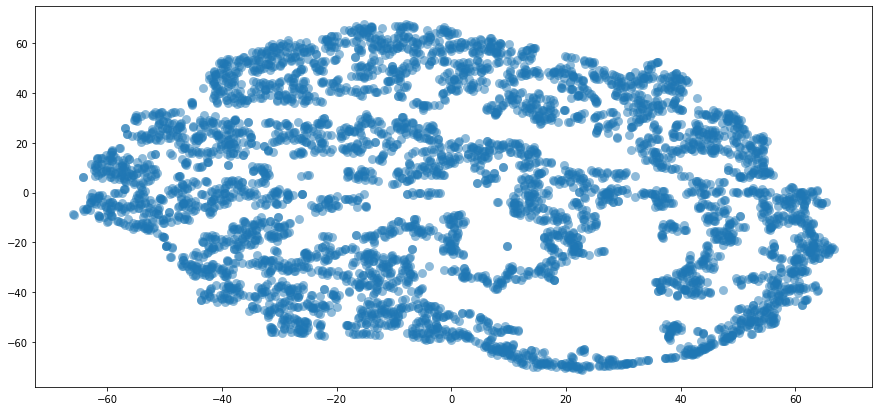

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(word_vectors, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


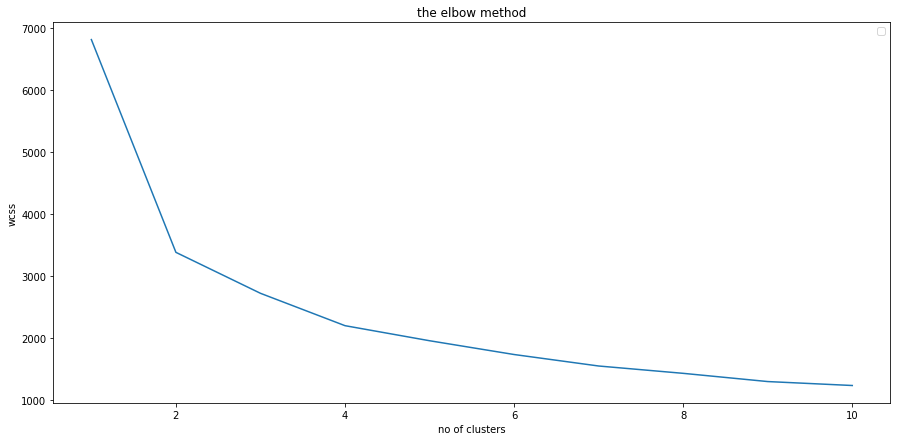

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(word_vectors)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(word_vectors)
print(y_kmeans)

[4 4 4 ... 2 2 2]


In [ ]:
y_kmeans

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [ ]:
len(y_kmeans)

5220

IMPLEMENTATION OF DOC2VEC

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec ,  TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
# Tokenization of each document
import nltk
nltk.download('punkt')
tokenized_project = []
for project in new_corpus_customsp:
    tokenized_project.append(word_tokenize(project.lower()))
tokenized_project

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(project, [i]) for i, project in enumerate(tokenized_project)]
tagged_data

[TaggedDocument(words=['de', 'duplication', 'faces', 'major', 'challenges', 'de', 'dup', 'algorithm', 'complexity', 'means', 'time', 'get', 'answer', 'rise', 'exponentially', 'increase', 'solved', 'sorted', 'neighborhood', 'second', 'achieve', 'tradeoff', 'precision', 'recall', 'improves', 'score', 'solved', 'machine', 'learning', 'collecting', 'training'], tags=[0]),
 TaggedDocument(words=['analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'comparison', 'peers', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'calculated', 'liquidity', 'financing', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited'], tags=[1]),
 TaggedDocument(words=['psnr', 'currently', 'drafting', 'paperforthe', 'algorithm', 'reconstruction', 'k', 'space', 'superresolution', 'images', 'nmri', 'lot', 'faster', 'highly', 'sub', 'sampled', 'knee', 'mri', 'forthe', 'packed', 'imaginary', 'na

In [ ]:
## Train doc2vec model
d2v_model = Doc2Vec(tagged_data, vector_size=20, window=2, min_count=1, workers=4, epochs = 100)
# Save trained doc2vec model
d2v_model.save("test_doc2vec.model")
## Load saved doc2vec model
d2v_model= Doc2Vec.load("test_doc2vec.model")
## Print model vocabulary
d2v_model.wv.vocab

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


{'de': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2828>,
 'duplication': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac28d0>,
 'faces': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2940>,
 'major': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac29b0>,
 'challenges': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac29e8>,
 'dup': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2a58>,
 'algorithm': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2a90>,
 'complexity': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2ac8>,
 'means': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2b38>,
 'time': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2ba8>,
 'get': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2c18>,
 'answer': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2c88>,
 'rise': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2cf8>,
 'exponentially': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2d30>,
 'increase': <gensim.models.keyedvectors.Vocab at 0x7f7de0ac2d68>,
 'solved': <gensi

In [ ]:
d2v_model.docvecs[627]

array([-0.2604735 ,  0.19217381,  1.664082  ,  0.64425886,  1.5574272 ,
       -1.084082  ,  0.5439708 , -0.73922986,  0.02255805, -2.1631067 ,
        1.387697  , -0.04051334, -1.0626364 , -1.0925055 ,  1.101388  ,
       -0.8679083 , -0.5085494 , -0.17629597,  0.71638536, -0.12410966],
      dtype=float32)

In [ ]:
doc_vectors = d2v_model.docvecs.doctag_syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


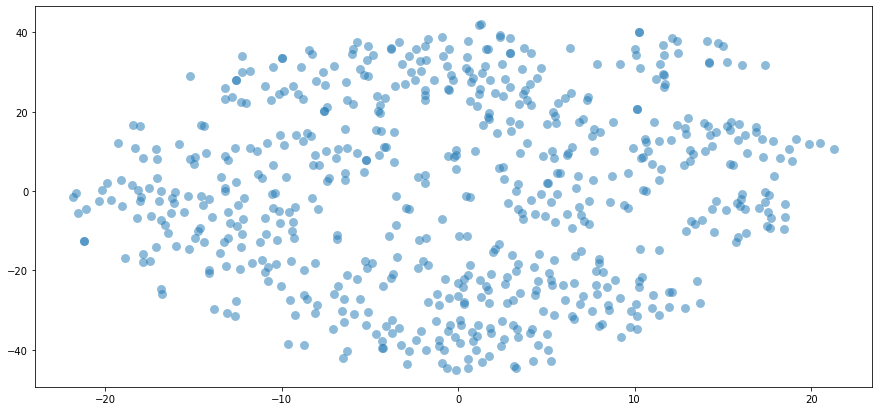

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(doc_vectors, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


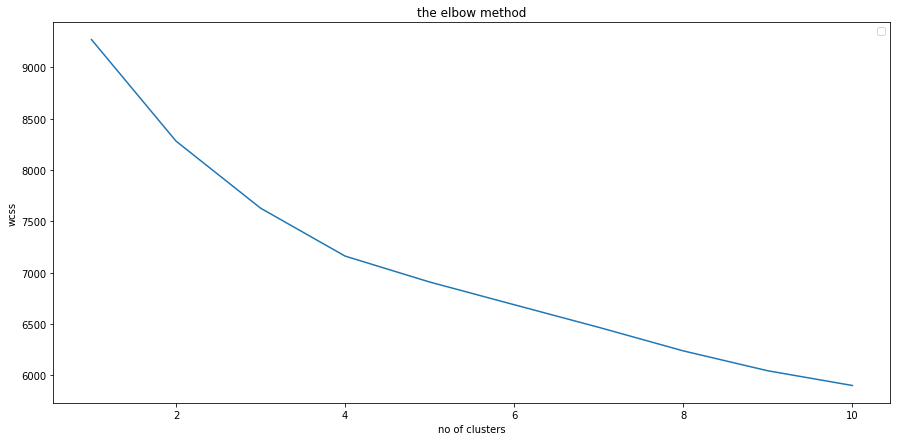

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(doc_vectors)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(doc_vectors)
print(y_kmeans)

[1 2 0 1 4 1 3 3 0 3 1 1 2 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 2 0 3 1 3 0 1 0 0
 1 1 3 4 1 1 3 4 3 1 1 1 0 1 3 3 0 0 0 3 0 0 1 1 1 1 3 0 2 4 4 1 3 1 0 0 0
 3 0 3 3 1 1 1 2 1 3 1 0 0 0 3 2 0 1 0 1 0 3 3 3 2 4 0 1 0 0 1 3 1 1 3 0 3
 2 3 0 1 1 4 4 4 0 0 0 1 0 0 0 0 0 3 4 0 0 0 0 0 1 0 0 1 0 0 0 3 0 0 1 0 0
 0 0 0 4 0 3 3 1 1 1 0 3 3 0 0 1 3 3 3 0 4 0 2 3 1 0 4 4 4 2 0 0 0 0 0 3 0
 3 3 1 2 0 0 0 0 0 0 0 2 4 0 0 1 1 1 2 0 1 2 1 2 0 0 0 3 0 0 0 0 1 1 0 4 0
 0 0 0 0 0 1 1 0 1 1 1 3 0 0 0 1 0 0 0 1 0 0 0 4 0 0 0 0 0 4 0 4 0 3 3 0 1
 0 1 0 2 1 0 0 0 0 0 0 4 3 1 1 0 0 0 0 1 3 4 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1
 2 0 3 0 4 4 0 1 0 4 0 0 1 1 1 0 0 0 0 1 0 1 0 4 1 0 0 3 4 4 1 0 3 2 0 0 1
 4 3 0 2 2 0 0 2 1 1 1 0 0 1 1 2 0 2 1 1 1 3 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0
 2 0 1 0 1 1 1 2 0 3 0 3 0 0 0 1 2 0 0 0 4 2 0 0 4 2 1 0 0 3 1 0 1 0 2 0 0
 1 0 3 4 2 3 0 2 3 3 0 4 0 3 0 3 3 1 0 0 0 1 0 3 4 0 2 3 1 0 3 0 2 0 0 0 4
 4 2 0 0 0 3 0 3 0 2 0 1 1 4 1 0 0 0 4 2 2 4 1 1 3 0 1 0 4 3 4 2 1 2 2 1 4
 3 3 3 1 2 2 3 0 4 0 0 0 

In [ ]:
len(y_kmeans)

628

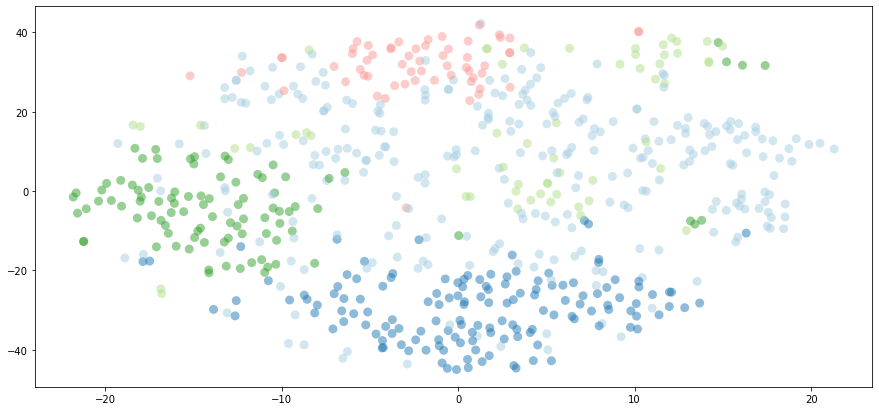

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[doc_vectors] if doc_vectors >= 0
                  else (0.5, 0.5, 0.5)
                  for doc_vectors in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(doc_vectors) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(doc_vectors, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.11018809
For no of clusters = 3  The average silhouette_score is : 0.112740435
For no of clusters = 4  The average silhouette_score is : 0.109162785
For no of clusters = 5  The average silhouette_score is : 0.11170472
For no of clusters = 6  The average silhouette_score is : 0.07678875
For no of clusters = 7  The average silhouette_score is : 0.083579406
For no of clusters = 8  The average silhouette_score is : 0.08800005
For no of clusters = 9  The average silhouette_score is : 0.050664846
For no of clusters = 10  The average silhouette_score is : 0.047897868


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

275

In [ ]:
#projects in cluster 1
list1

['psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'algorithm dynamic maze moving obstacles path source destination',
 'client wanted entities documents due documents size taking lot time manually automate names entities recognition entity disambiguation',
 'shooting game pygame end animations maximize score shooting enemy spaceships asteroids',
 'scraping module extract disease web newspapers last years instituted unsupervised classifier sentiment analyser categorize articles types effect reader temporal regional analysis extracted analyze progress suggest modification nhiv eradication campaign',
 'heavy loads servers reduced ipfs warning red zones city',
 'chunking maximum entropy models koe https www aclweb org anthology w pdf baseline selects chunk tag frequently associated nthe speech tag',
 'semi supervised graph link prediction derivational n

JUST PRINTING THE TOP WORDS BY TFIDF TO JUST GET AN IDEA OF CLUSTER NOTHING TO DO WITH ANYOTHER THING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
167          learning  0.030977
144             image  0.026565
272            python  0.025723
185           machine  0.022145
8           algorithm  0.022016
19                app  0.021640
341              time  0.020851
124              game  0.018889
173              like  0.018415
365           website  0.018022
186  machine learning  0.017379
11           analysis  0.017276
88           designed  0.017155
216           network  0.016040
266        processing  0.016012
201            models  0.015928
218            neural  0.014913
157              java  0.014844
309               set  0.014391
347           trained  0.014262
9          algorithms  0.013752
161          language  0.013681
15            android  0.013618
339              text  0.013523
312            simple  0.013478
102               end  0.013370
84               deep  0.012842
364               web  0.012292
118          features  0.012215
123         framework  0.012139
219    neural network  0.011843
253          platform  0.011790
308            server  0.011687
281       recognition  0.011654
283    recommendation  0.011526
325             state  0.011452
131               gui  0.011000
50     classification  0.010781
85      deep learning  0.010700
139              html  0.010578

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of psnr is : 1
Frequency of currently is : 3
Frequency of drafting is : 1
Frequency of paperforthe is : 1
Frequency of algorithm is : 18
Frequency of reconstruction is : 5
Frequency of k is : 7
Frequency of space is : 4
Frequency of superresolution is : 1
Frequency of images is : 7
Frequency of nmri is : 1
Frequency of lot is : 3
Frequency of faster is : 3
Frequency of highly is : 1
Frequency of sub is : 1
Frequency of sampled is : 1
Frequency of knee is : 1
Frequency of mri is : 1
Frequency of forthe is : 1
Frequency of packed is : 1
Frequency of imaginary is : 1
Frequency of nand is : 3
Frequency of parts is : 4
Frequency of fourier is : 1
Frequency of dynamic is : 3
Frequency of maze is : 1
Frequency of moving is : 3
Frequency of obstacles is : 3
Frequency of path is : 3
Frequency of source is : 5
Frequency of destination is : 2
Frequency of client is : 3
Frequency of wanted is : 1
Frequency of entities is : 2
Frequency of documents is : 3
Frequency of due is : 4
Frequency

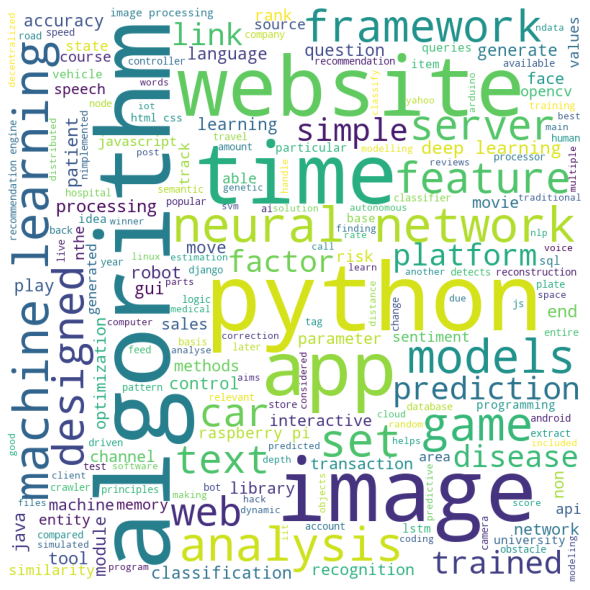

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

143

In [ ]:
list2

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'beat baseline score credibility prediction events credbank initial exploratory analysis multi hierarchical attention network operating tweet plan hierarchical transformer encoder decoder architecture improve',
 'end end pipeline abnormalitie

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
132           image  0.059433
184         network  0.057500
136          images  0.053699
153        learning  0.049457
190          neural  0.048333
292         trained  0.046865
52              cnn  0.037805
4          accuracy  0.037683
71             deep  0.036211
191  neural network  0.034506
72    deep learning  0.031292
172          models  0.030843
160            lstm  0.030533
189        networks  0.028994
148        language  0.028778
158            like  0.028209
45   classification  0.027088
294        training  0.025464
16     architecture  0.025377
280      tensorflow  0.024869
9         algorithm  0.024292
162         machine  0.022093
103        features  0.021701
227          python  0.020981
211           paper  0.020946
64    convolutional  0.020737
229         pytorch  0.020489
49         classify  0.020167
236     recognition  0.020065
269           state  0.019239

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 3
Frequency of duplication is : 1
Frequency of faces is : 7
Frequency of major is : 3
Frequency of challenges is : 2
Frequency of dup is : 1
Frequency of algorithm is : 18
Frequency of complexity is : 1
Frequency of means is : 3
Frequency of time is : 16
Frequency of get is : 5
Frequency of answer is : 4
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 6
Frequency of solved is : 3
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 2
Frequency of achieve is : 6
Frequency of tradeoff is : 1
Frequency of precision is : 3
Frequency of recall is : 3
Frequency of improves is : 1
Frequency of score is : 10
Frequency of machine is : 15
Frequency of learning is : 63
Frequency of collecting is : 1
Frequency of training is : 19
Frequency of accuracy is : 34
Frequency of classification is : 23
Frequency of basis is : 3
Frequency of position is : 2
Frequency of camera is : 5
Frequency of flowneta is : 1
Freq

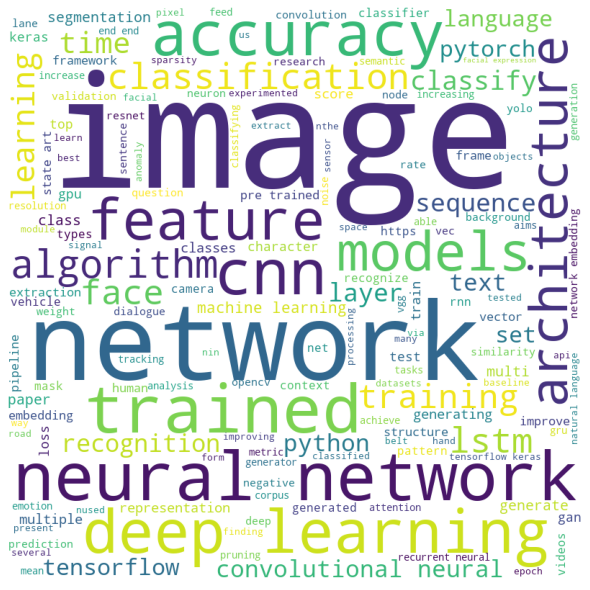

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

57

In [ ]:
list3

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'clustering categorise countries socio economic health factors finding countries need focus prepared cleaned adequate along treating outliers silhouette score elbow optimal clusters assign countries cluster ids segregate logical groups patterns',
 'autonomous humanoid agents playing soccer intelligently simulated nenvironment following physics rule soccer optimized like walking kicking factor x evolutionary strategies cma es ever simspark humanoid gym openai rl nalgorithms trpo ddpg optimize passing dodging defense positioning modules voronoi point map nping hungarian algorithm active attacker selection secured nd position goalie scientific finished th league undergraduate qualify ever competition',
 'designing software air collab

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
4      algorithm  0.076143
77    processing  0.050987
98          time  0.048184
45         image  0.043730
6       analysis  0.043157
107        years  0.042167
9     autonomous  0.040644
52      language  0.038734
102       visual  0.037084
78   programming  0.036292
83         robot  0.034885
15    clustering  0.032815
76    predicting  0.031115
7         answer  0.030522
33      features  0.030459
11          best  0.029980
2     activities  0.029580
94      suitable  0.029238
12    calculated  0.028827
34         files  0.028773
42          grid  0.027352
3             ai  0.027174
96          test  0.026097
60       methods  0.025791
18      compared  0.024894
89      software  0.024732
54          like  0.024694
101       vision  0.024680
70        period  0.024619
44           iit  0.024562

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 2
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 3
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of comparison is : 1
Frequency of peers is : 1
Frequency of fundamental is : 1
Frequency of analysis is : 8
Frequency of financial is : 3
Frequency of statements is : 1
Frequency of calculated is : 5
Frequency of relevant is : 2
Frequency of ratios is : 2
Frequency of evaluate is : 1
Frequency of status is : 1
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 4
Frequency of best is : 5
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 1
Frequency of forge is : 1
Frequency of clustering is : 9
Frequency of categorise is : 1
Frequency of countries is : 3
Frequency of socio is : 3
Frequency of economic is : 3
Frequency of health is : 4
Frequency of factors is : 6
Frequency of finding is : 2
Frequency of need is : 1
Frequency of focus is : 3
Frequency

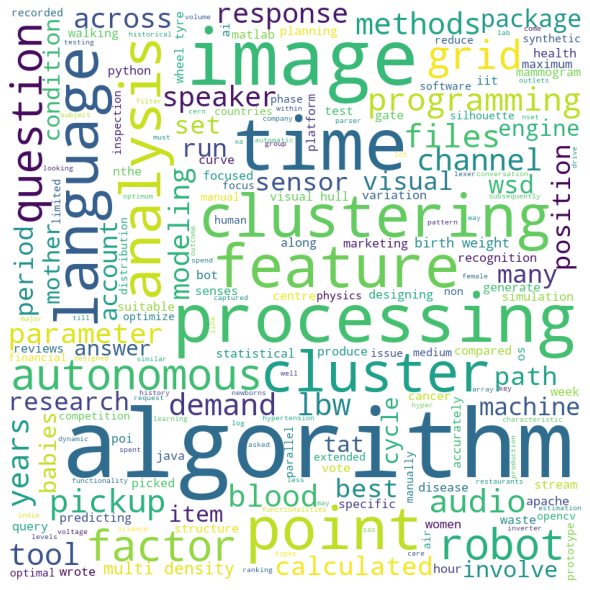

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

94

In [ ]:
list4

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'analyzing millions financial fraudulent hand audit analytics platform leveraged collect erps rules features extraction engine rules customizable client predictive models features',
 'author python library einsteinpy library computations nrelativity geodesic equations solving odes visualisations summer gsoc openastronomy numbrella along standalone organisation esa socis set ci cd test automation documentation forthe codebase research university toronto cern nstudying negative matter effect gravitational lensing sponsored python software foundation numfocus esa',
 'clients many erps sap oracle financial maintain financial though erps captured analysis remains client audit analytics platform transform interface conducting exploratory analysis visualization analytics tools anomaly duplication top 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
8              algorithms  0.060295
12               analysis  0.059097
78               features  0.046955
171                python  0.045732
34         classification  0.041587
2                accuracy  0.040961
179            regression  0.040195
198                   set  0.038816
76                feature  0.038075
109                  like  0.033821
38               cleaning  0.033570
175                random  0.032634
125                models  0.031646
85                 forest  0.028986
176         random forest  0.028986
235         visualization  0.027961
163            predicting  0.027389
115   logistic regression  0.026897
114              logistic  0.026897
35             classifier  0.026652
82              financial  0.026529
168                 price  0.026528
190                 sales  0.026279
207                   svm  0.024951
73   exploratory analysis  0.024922
72            exploratory  0.024922
106              learning  0.024878
110                linear  0.024092
213                  text  0.024001
7               algorithm  0.023355

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 1
Frequency of telecom is : 2
Frequency of firm is : 5
Frequency of predictive is : 3
Frequency of models is : 16
Frequency of risk is : 10
Frequency of churn is : 3
Frequency of main is : 1
Frequency of indicators is : 2
Frequency of filtered is : 1
Frequency of revenue is : 2
Frequency of generate is : 4
Frequency of tagging is : 2
Frequency of churned is : 2
Frequency of service is : 1
Frequency of usage is : 5
Frequency of also is : 9
Frequency of strong is : 1
Frequency of analyzing is : 2
Frequency of millions is : 1
Frequency of financial is : 12
Frequency of fraudulent is : 3
Frequency of hand is : 1
Frequency of audit is : 2
Frequency of analytics is : 8
Frequency of platform is : 2
Frequency of leveraged is : 1
Frequency of collect is : 3
Frequency of erps is : 4
Frequency of rules is : 2
Frequency of features is : 28
Frequency of extraction is : 3
Frequency of engine is : 1
Frequency of customizable is : 1
Frequency of client is : 5
Frequency of aut

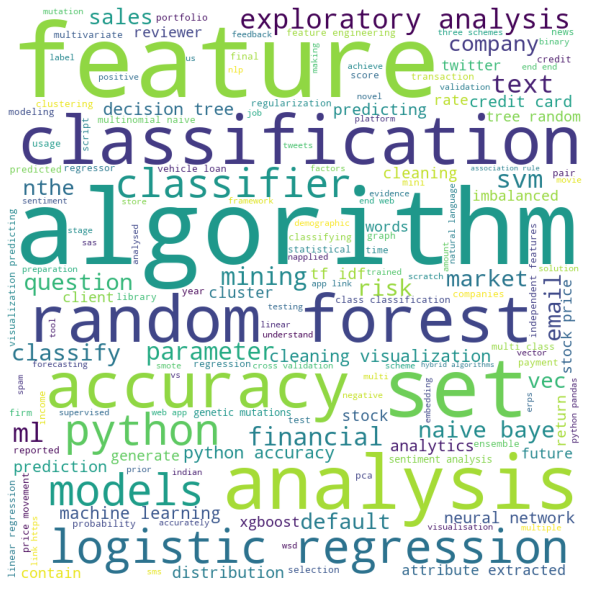

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

59

In [ ]:
list5

['side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'resulting mape forward prediction interval novel attention nmultivariate time series id fan false negatives false positives test samples deploying month nrunning simulation integrated control loop trip logic equipment understudy avoid false alarms nprogram interpretable operator expected crore annual savings deployment module terms shutdown avoidance',
 'leading contributors python library poliastro astrodynamics npython dedicated problems orbit propagation solution lamberts nproblem conversion position velocity vectors classical orbital nelements orbit plotting focusing interplanetary contributions api plotting module addition frame nreference multiple bug fixes gave talk poliastro pycon i

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
7          android  0.110786
12             app  0.072835
115           time  0.068088
76          module  0.064189
11             api  0.052309
24         control  0.042315
36        features  0.041522
121        website  0.039254
63            java  0.035465
104         server  0.034738
75          mobile  0.034470
43   functionality  0.033873
71             map  0.032667
83            need  0.031071
48             gui  0.030619
67            like  0.029853
112      streaming  0.029782
84            nthe  0.029331
120            web  0.029240
23   communication  0.027482
119         videos  0.026681
97           robot  0.026168
95    registration  0.025880
72            maps  0.025563
80           mysql  0.025117
54           helps  0.025082
3         advanced  0.023980
25            core  0.023314
69            live  0.023294
66         library  0.023117

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of side is : 4
Frequency of simple is : 2
Frequency of interface is : 7
Frequency of machine is : 1
Frequency of learning is : 1
Frequency of personalize is : 1
Frequency of scalable is : 2
Frequency of responsive is : 2
Frequency of suggests is : 2
Frequency of job is : 5
Frequency of seeker is : 1
Frequency of need is : 7
Frequency of upload is : 1
Frequency of resume is : 7
Frequency of list is : 2
Frequency of relevant is : 1
Frequency of jobs is : 2
Frequency of inputs is : 1
Frequency of achieve is : 3
Frequency of web is : 7
Frequency of crawler is : 1
Frequency of get is : 7
Frequency of descriptions is : 3
Frequency of websites is : 1
Frequency of processed is : 1
Frequency of text is : 4
Frequency of mining is : 1
Frequency of extract is : 1
Frequency of finally is : 1
Frequency of predictive is : 1
Frequency of similar is : 3
Frequency of resulting is : 1
Frequency of mape is : 1
Frequency of forward is : 1
Frequency of prediction is : 1
Frequency of interval is : 

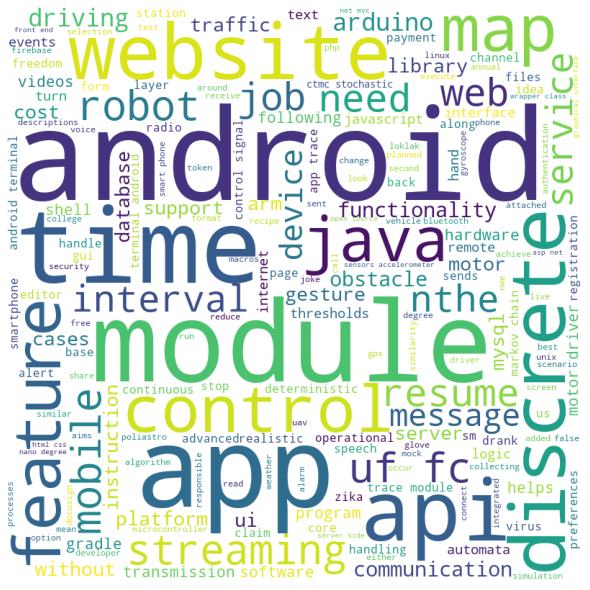

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 